In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score
data = pd.read_csv("/content/CSV.csv",parse_dates=["Date"],index_col='Date')
data
# type(data.Date[0])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-26,18.760000,18.770000,18.510000,18.730000,18.463934,48700
2019-06-27,18.719999,18.920000,18.510000,18.820000,18.552654,60600
2019-06-28,18.820000,19.080000,18.740000,19.010000,18.739958,295200
2019-07-01,19.070000,19.219999,18.570000,18.670000,18.404787,97400
2019-07-02,18.730000,18.870001,18.549999,18.840000,18.572371,42800
...,...,...,...,...,...,...
2020-06-19,19.360001,19.389999,18.660000,19.120001,19.120001,213100
2020-06-22,19.260000,19.260000,18.540001,18.980000,18.980000,203100
2020-06-23,19.219999,19.219999,18.639999,18.670000,18.670000,91900


In [3]:
data.shape

(253, 7)

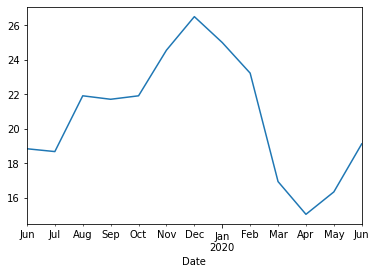

In [31]:
data.Close.resample('M').mean().plot()

In [32]:
data.Close.dtype

dtype('float64')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-26 to 2020-06-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [130]:

x = data[['Open','High','Low','Volume']].values
x
y=data[["Close"]].values
y

array([[18.73    ],
       [18.82    ],
       [19.01    ],
       [18.67    ],
       [18.84    ],
       [18.950001],
       [19.02    ],
       [18.459999],
       [18.23    ],
       [18.57    ],
       [18.379999],
       [18.58    ],
       [18.67    ],
       [18.5     ],
       [18.309999],
       [18.200001],
       [18.09    ],
       [18.440001],
       [18.469999],
       [18.780001],
       [18.940001],
       [19.15    ],
       [19.35    ],
       [19.459999],
       [19.120001],
       [22.34    ],
       [21.92    ],
       [22.5     ],
       [22.34    ],
       [22.25    ],
       [22.6     ],
       [22.450001],
       [22.219999],
       [21.85    ],
       [22.18    ],
       [22.      ],
       [22.49    ],
       [22.65    ],
       [22.200001],
       [21.83    ],
       [21.51    ],
       [20.99    ],
       [21.52    ],
       [20.959999],
       [21.129999],
       [21.1     ],
       [21.27    ],
       [21.129999],
       [21.08    ],
       [21.309999],


In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 2)

In [132]:
Linear_Reg = LinearRegression()
fit = Linear_Reg.fit(x_train,y_train)


In [133]:
fit.coef_

array([[-6.11419512e-01,  6.76223438e-01,  9.45799655e-01,
         6.98924699e-07]])

In [134]:
fit.intercept_

array([-0.22654149])

In [135]:
y_pred = fit.predict(x_test)
y_pred

array([[22.43362776],
       [18.62660157],
       [25.13384399],
       [25.13377691],
       [24.75522143],
       [20.91353583],
       [21.99056721],
       [22.29729227],
       [18.74227708],
       [27.72865541],
       [14.55843938],
       [22.62268665],
       [25.59882253],
       [21.59195145],
       [20.95361399],
       [18.3085002 ],
       [19.02009696],
       [20.94210154],
       [21.3333834 ],
       [18.71292571],
       [16.08371183],
       [15.33574177],
       [25.28739324],
       [24.13289531],
       [19.48455704],
       [18.90303799],
       [25.71310453],
       [21.49231429],
       [19.27381217],
       [22.57001306],
       [21.29897056],
       [20.02002689],
       [25.77849146],
       [19.00929244],
       [22.5830727 ],
       [16.38421298],
       [25.13065664],
       [26.5314596 ],
       [26.20192004],
       [24.29512148],
       [15.5900461 ],
       [15.58704108],
       [19.29771757],
       [14.69393299],
       [14.9286633 ],
       [18

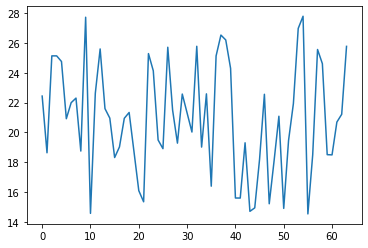

In [136]:
plt.plot(y_pred)

In [137]:
New_dataframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
New_dataframe

,Actual,Predicted
0,22.540001,22.433628
1,18.500000,18.626602
2,25.020000,25.133844
3,25.420000,25.133777
4,24.730000,24.755221
...,...,...
59,18.490000,18.500209
60,18.370001,18.486353
61,20.440001,20.687977
62,21.129999,21.210793


In [138]:
ac= fit.score(x_test,y_test)
ac = ac*100
ac = float("{0:.2f}".format(ac))
print('Accuracy is:',ac,'%')


Accuracy is: 99.74 %


In [139]:
metrics.mean_absolute_error(y_test,y_pred)

0.1508750352016833

In [140]:
metrics.mean_squared_error(y_test,y_pred)

0.03581187083933106

In [141]:
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.18924024635190861

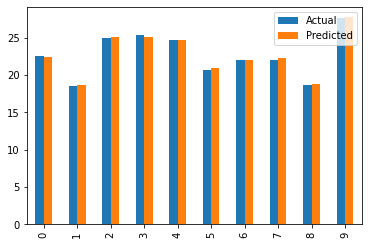

In [142]:
plot = New_dataframe.head(10)
plot.plot(kind ='bar')